In [115]:
from PIL import Image
from keras.models import load_model, Model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [68]:
model = load_model('trained_Model.hdf5')
model.load_weights('trained_Model.hdf5')

In [101]:
label_dic = {0:'Covid19 Positive',
            1: 'Covid19 Negative',
            2: 'Pnemonia'}

Covid19 Negative 
 99.80%


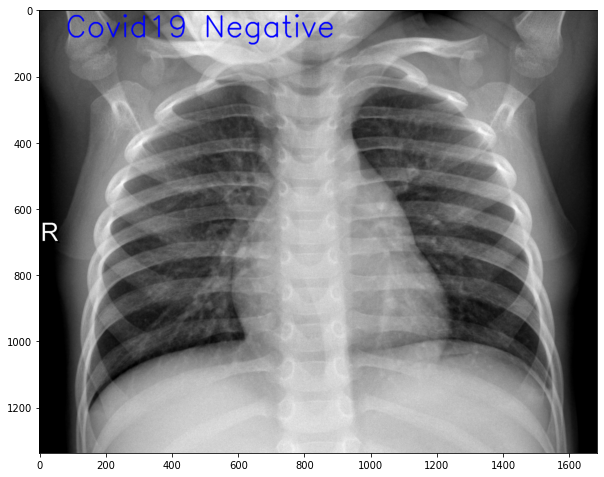

In [135]:
new_data2 = []

new_imag2 = cv2.imread('./testing-dataset/normal/NORMAL2-IM-1266-0001.jpeg')
img = new_imag2.copy()
new_imag2 = cv2.cvtColor(new_imag2, cv2.COLOR_BGR2RGB)
new_imag2 = cv2.resize(new_imag2, (224,224))
new_data2.append(new_imag2)

new_data2 = np.array(new_data2)/255.0

prediction = model.predict(new_data2, batch_size=8)
result = np.argmax(prediction, axis=1)[0]
accuracy = float(np.max(prediction, axis=1)[0])
label = label_dic[result]
# print(prediction, result, accuracy)
print("{} \n {:.2f}%".format(label_dic[result], accuracy*100))


window_name = label_dic[result]
font = cv2.FONT_HERSHEY_SIMPLEX 
org = (80, 80) 
fontScale = 3
thickness = 3
rows = 1
columns = 3
fig = plt.figure(figsize=(10, 20))

img = cv2.putText(img, label_dic[result], org, font,
                    fontScale, (0, 0, 255), thickness, cv2.LINE_AA)
plt.imshow(img)
plt.axis('on')
plt.show()